# Listas enlazadas, colas, pilas, deques

## Listas enlazadas

Una lista enlazada (o ligada) es una estructura de datos que permite almacenar
elementos pero, a diferencia de los arreglos, no necesariamente en posiciones
consecutivas de memoria (ni siquiera deben estar “en orden”).

Cada nodo contiene dos partes principales:

Dato: El valor que almacena el nodo.
Referencia (enlace o puntero): Una dirección o referencia al siguiente nodo en la lista.

__Tipos de listas enlazadas__

**simplemente** enlazada: Cada nodo tiene un enlace que apunta al siguiente nodo.

**doblemente enlazada:** Cada nodo tiene dos enlaces: uno apunta al nodo anterior y otro al siguiente.


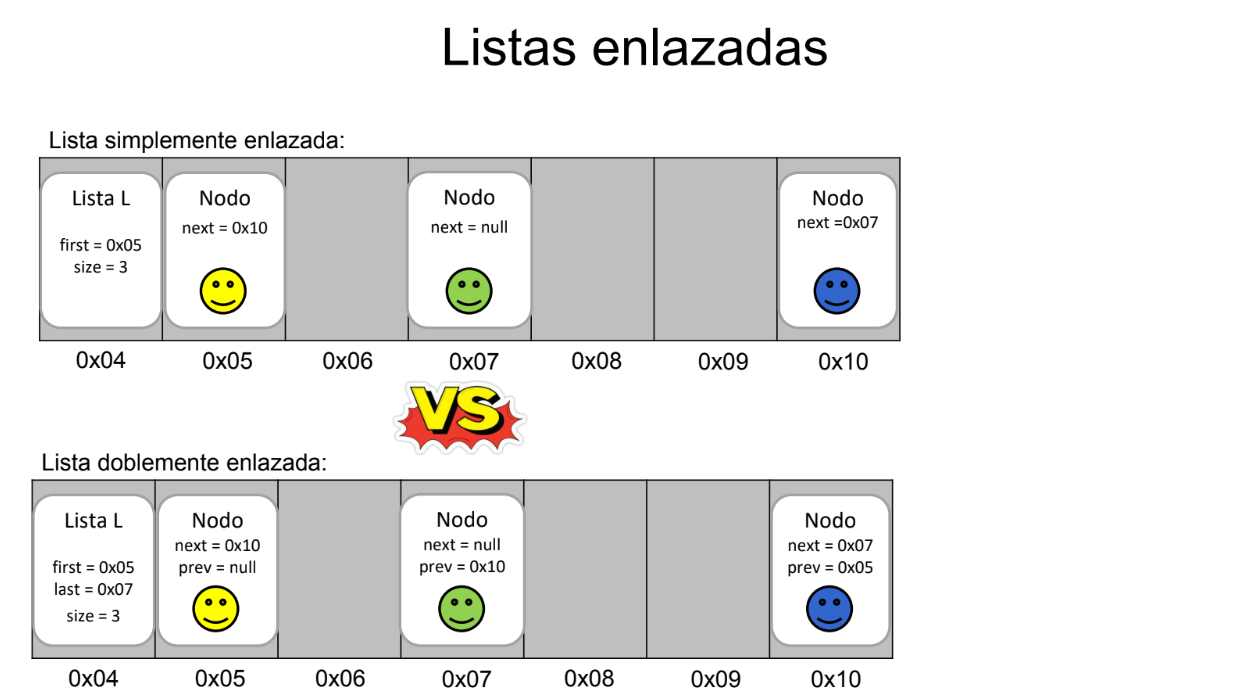

Ejemplo de implementación 

In [2]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, value):
        new_node = Node(value)
        if not self.head:
            self.head = new_node
            return
        current = self.head
        while current.next:
            current = current.next
        current.next = new_node

    def __str__(self):
        elements = []
        current = self.head
        while current:
            elements.append(str(current.value))
            current = current.next
        return " -> ".join(elements)

# Ejemplo de uso
ll = LinkedList()
ll.append("A")
ll.append("B")
ll.append("C")
print(ll)  # Imprime "A -> B -> C"

A -> B -> C


### Indexación

Como la lista en realidad solo “sabe” donde están el primer y
último elemento, acceder a ellos dos implica O(1), mientras
que para el resto de índiceses O(N)

### Modificación

Consiste en actualizar el elemento almacenado en un determinado índice.

Esta operación implica, primero acceder a la posición de memoria, que como
ya vimos es O(N) excepto para el primer y último elemento que es O(1), y
luego hacer el cambio, que es O(1)

### Busqueda

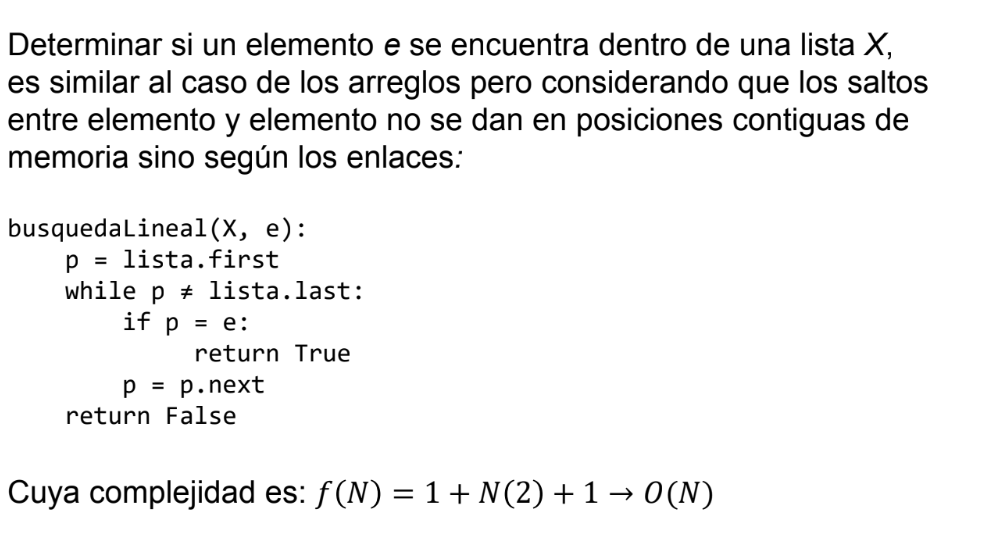

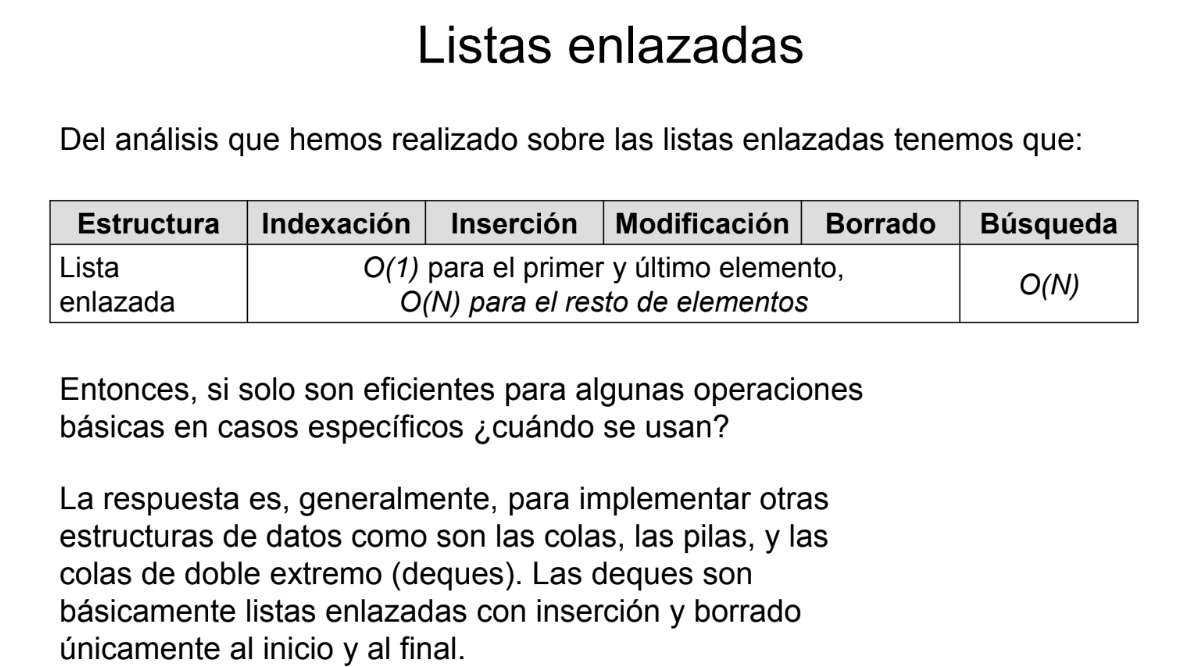

## Colas Y pilas


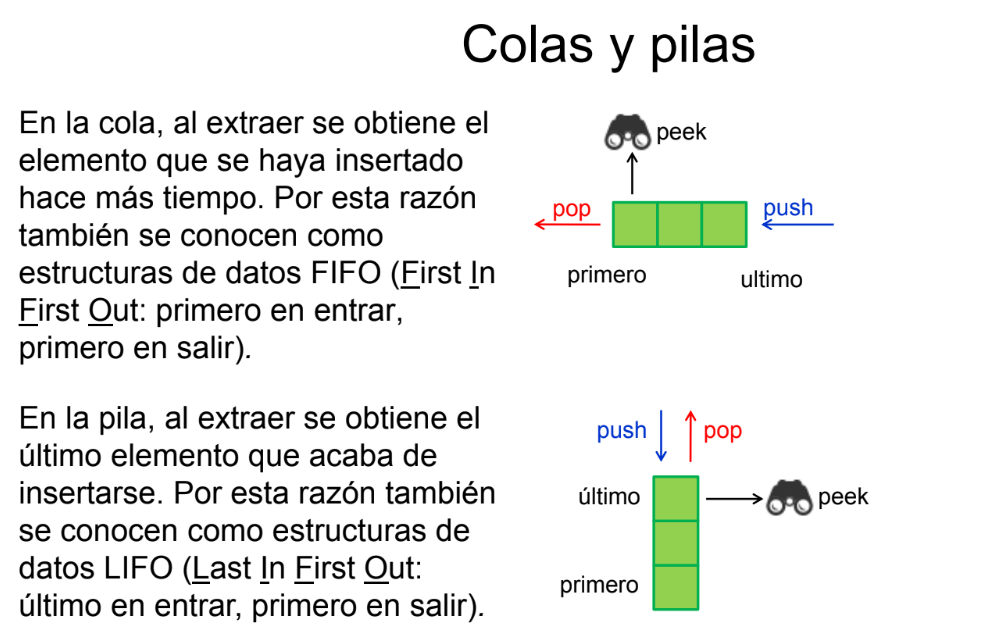

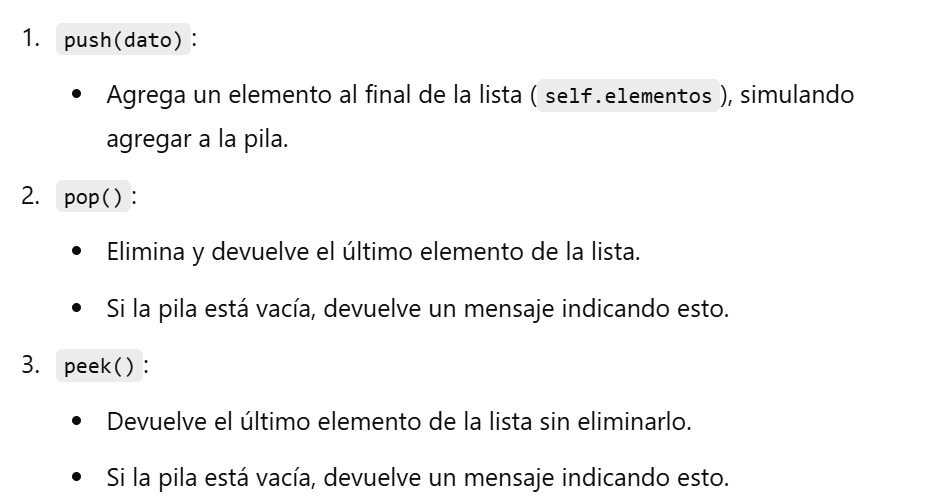

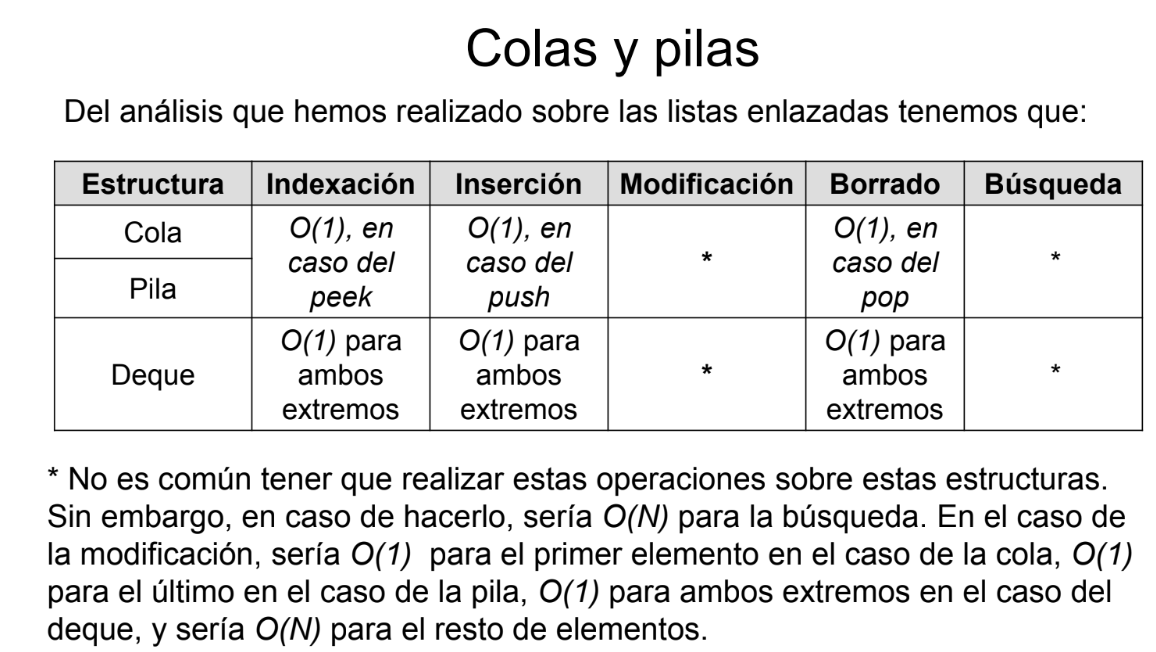

### Deque

Un deque (cola de doble extremo) permite agregar y eliminar elementos tanto al principio como al final. Es más flexible que una cola o una pila estándar.

## Ejemplos

In [3]:
## Colas
from collections import deque

# Crear una cola
cola = deque()

# Operaciones
cola.append(1)  # Agregar al final de la cola
cola.append(2)
cola.append(3)
print("Cola después de agregar:", list(cola))  # Salida: [1, 2, 3]

cola.popleft()  # Eliminar el primer elemento (FIFO)
print("Cola después de eliminar:", list(cola))  # Salida: [2, 3]


Cola después de agregar: [1, 2, 3]
Cola después de eliminar: [2, 3]


In [4]:
## Pilas 
# Crear una pila
pila = []

# Operaciones
pila.append(1)  # Agregar a la pila
pila.append(2)
pila.append(3)
print("Pila después de agregar:", pila)  # Salida: [1, 2, 3]

pila.pop()  # Eliminar el último elemento (LIFO)
print("Pila después de eliminar:", pila)  # Salida: [1, 2]


Pila después de agregar: [1, 2, 3]
Pila después de eliminar: [1, 2]


In [5]:
## Deque
from collections import deque

# Crear un deque
deque_ejemplo = deque()

# Operaciones
deque_ejemplo.append(1)  # Agregar al final
deque_ejemplo.append(2)
deque_ejemplo.appendleft(0)  # Agregar al principio
print("Deque después de agregar:", list(deque_ejemplo))  # Salida: [0, 1, 2]

deque_ejemplo.pop()  # Eliminar del final
print("Deque después de eliminar del final:", list(deque_ejemplo))  # Salida: [0, 1]

deque_ejemplo.popleft()  # Eliminar del principio
print("Deque después de eliminar del principio:", list(deque_ejemplo))  # Salida: [1]


Deque después de agregar: [0, 1, 2]
Deque después de eliminar del final: [0, 1]
Deque después de eliminar del principio: [1]


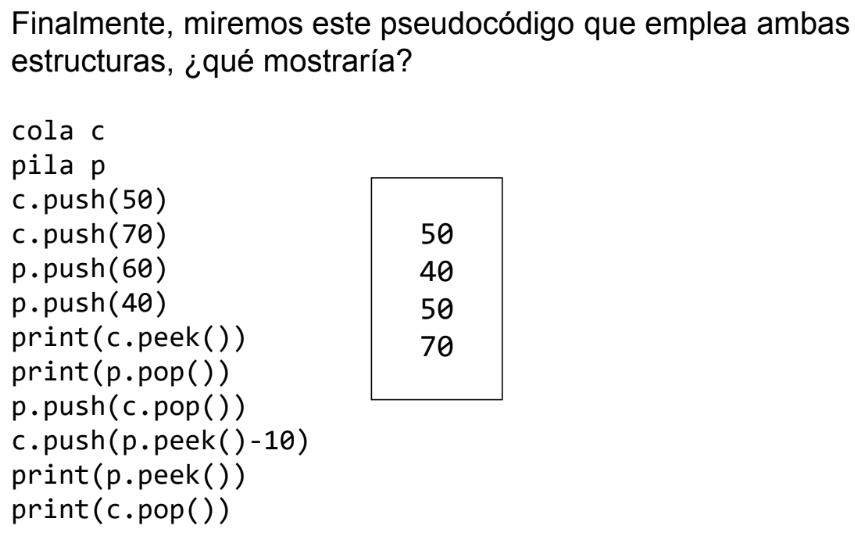

## Ejercicio 1


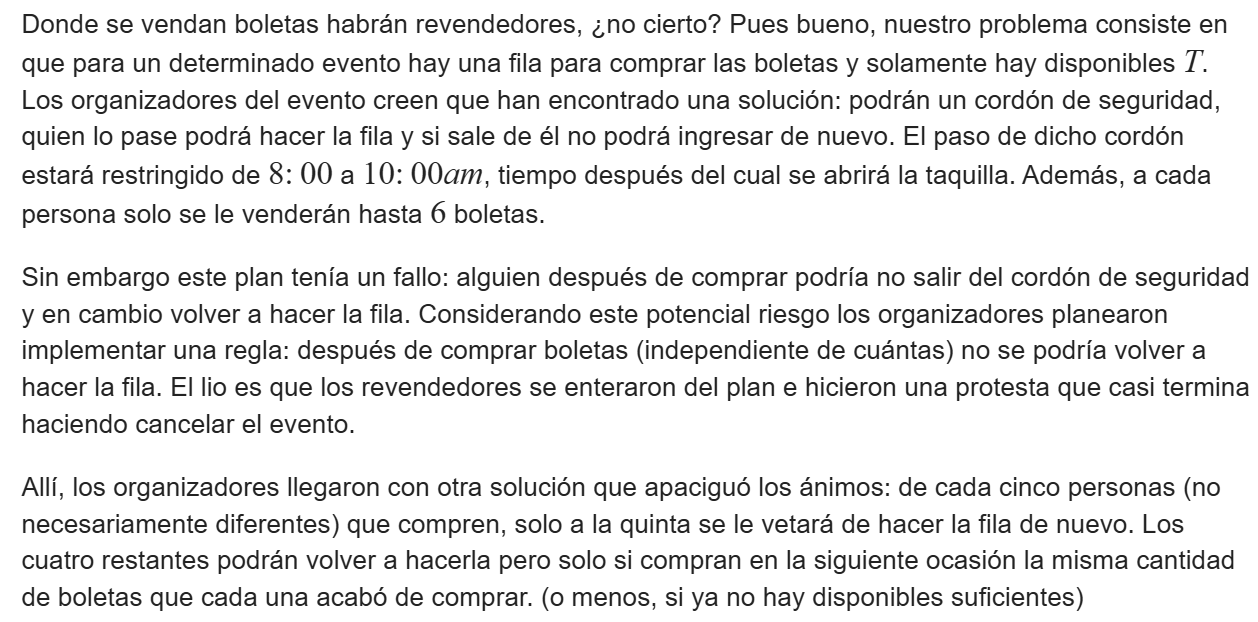

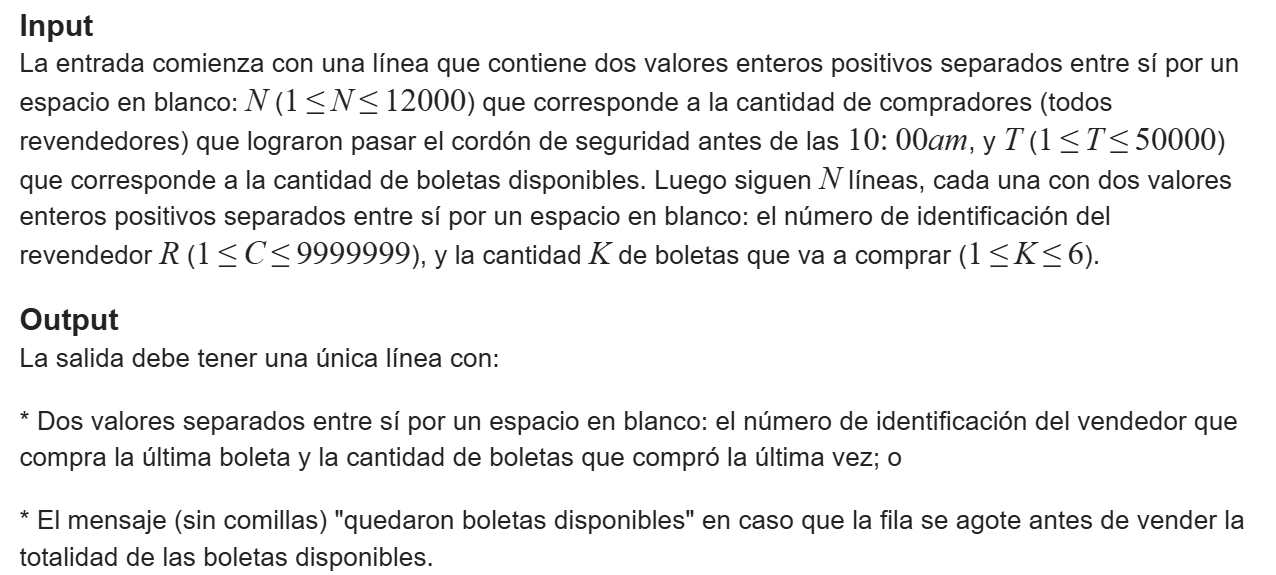

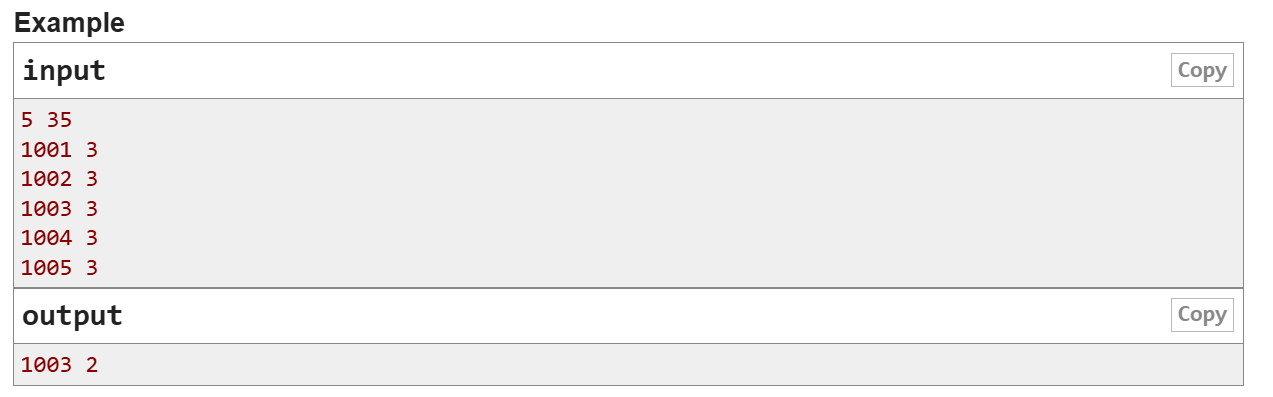

In [21]:
# Resolviendo con una cola
from collections import deque

def sell_tickets(n, t):
  queue = deque()
  count = 0  # Contador regla 5ta persona
  for _ in range(n):
    id, k = map(int, input().split())
    queue.append((id, k))

  while queue and t > 0:
    id, k = queue.popleft()
    count += 1
    if k > t:
      k = t
    t -= k
    if count % 5 != 0:
      queue.append((id, k))

  if t == 0:
    id, k = queue[-1]
    print(id, k)
  else:
    print("quedaron boletas disponibles")


n, t = map(int, input().split())


sell_tickets(n, t)

1003 2


## Ejercicio 2

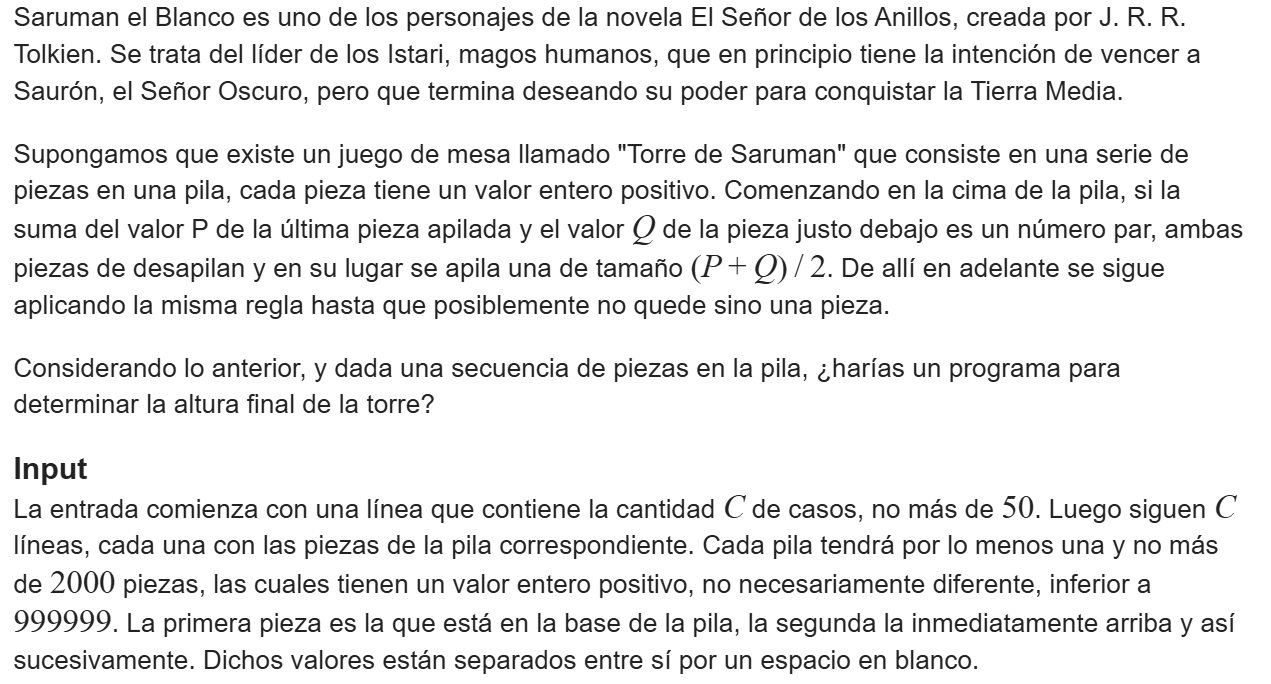

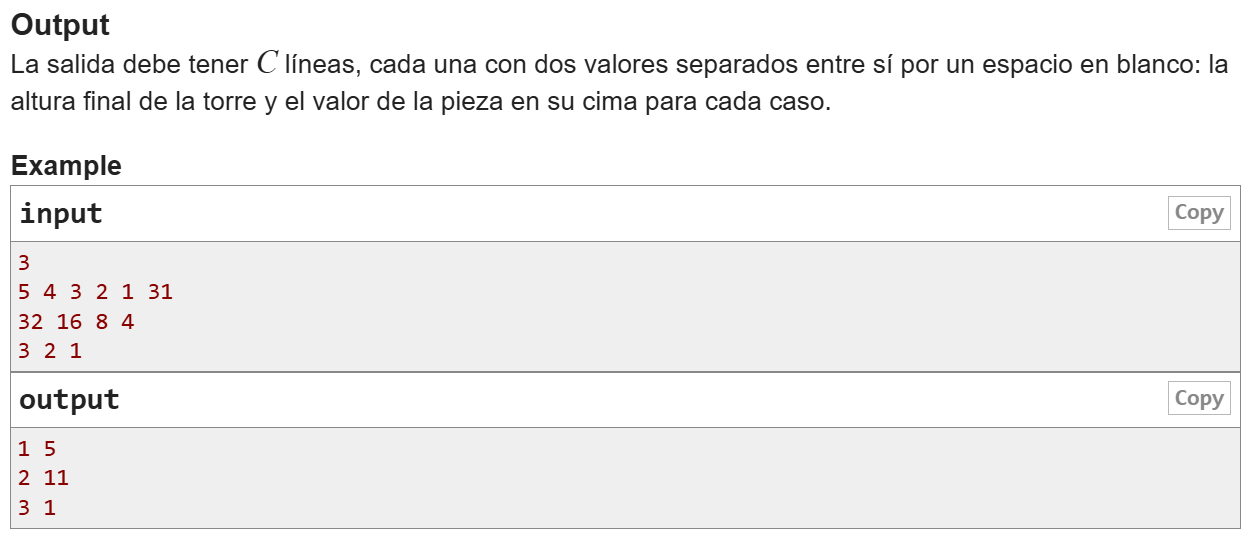

In [26]:
def torre_de_saruman(casos):
    resultados = []

    for caso in casos:
        # Convertir la lista de números en una pila
        pila = caso[:]

        while len(pila) > 1:
            # Tomar las dos últimas piezas
            P = pila.pop()
            Q = pila.pop()

            # Verificar si la suma es par
            if (P + Q) % 2 == 0:
                # Reemplazar con la nueva pieza
                nueva_pieza = (P + Q) // 2
                pila.append(nueva_pieza)
            else:
                # Si no es par, devolver las piezas a la pila
                pila.append(Q)
                pila.append(P)
                break

        # Guardar la altura final y la cima de la pila
        resultados.append((len(pila), pila[-1]))

    return resultados

# Leer entrada
C = int(input())
casos = []
for _ in range(C):
    caso = list(map(int, input().split()))
    casos.append(caso)

# Procesar los casos
resultados = torre_de_saruman(casos)

# Imprimir salida
for altura, cima in resultados:
    print(altura, cima)


1 5
2 11
3 1


## Ejercicio 3

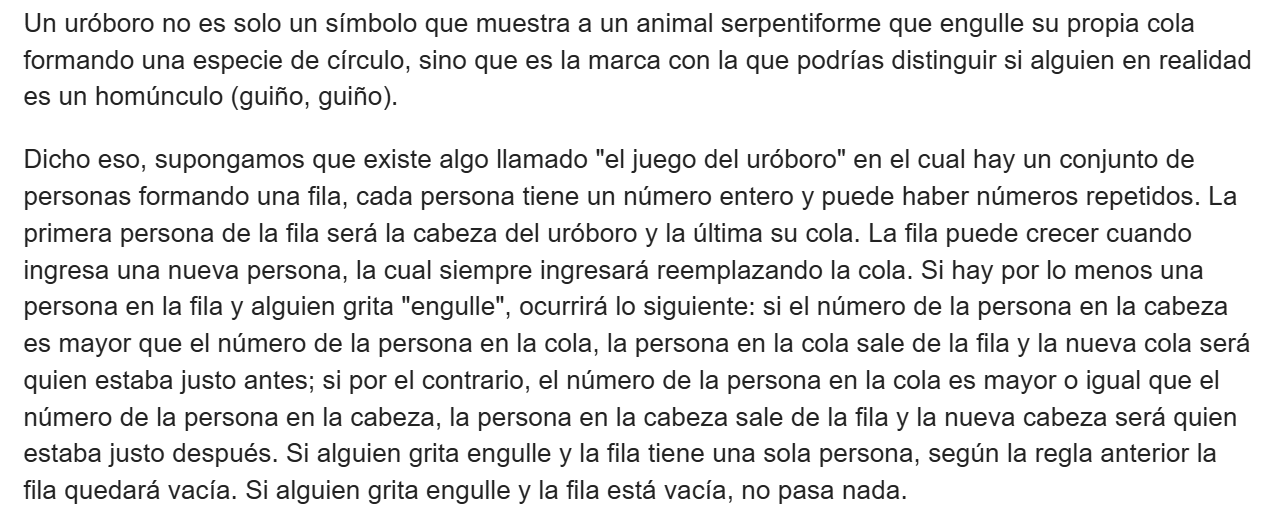

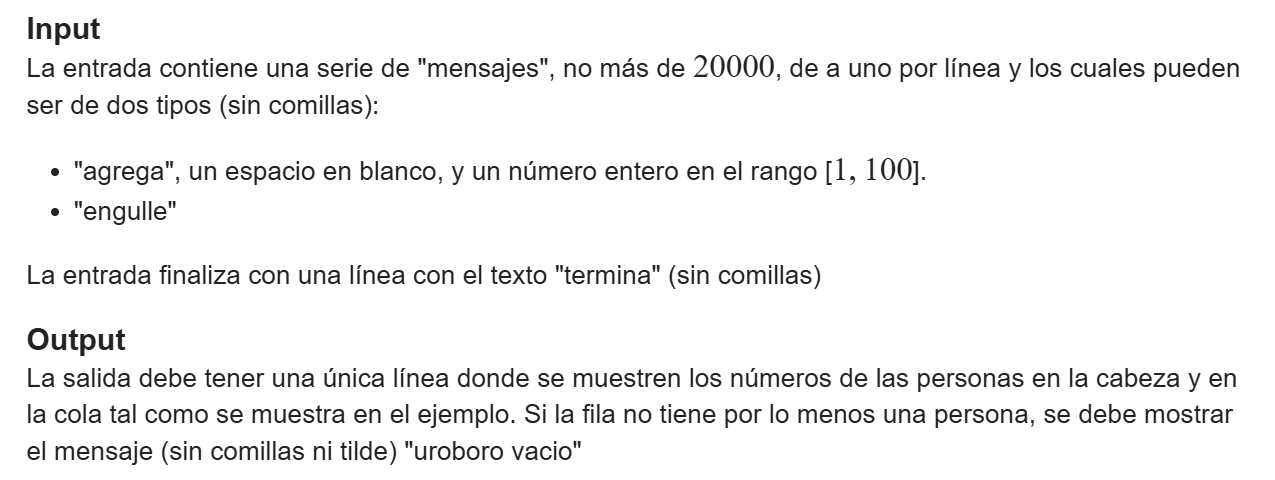

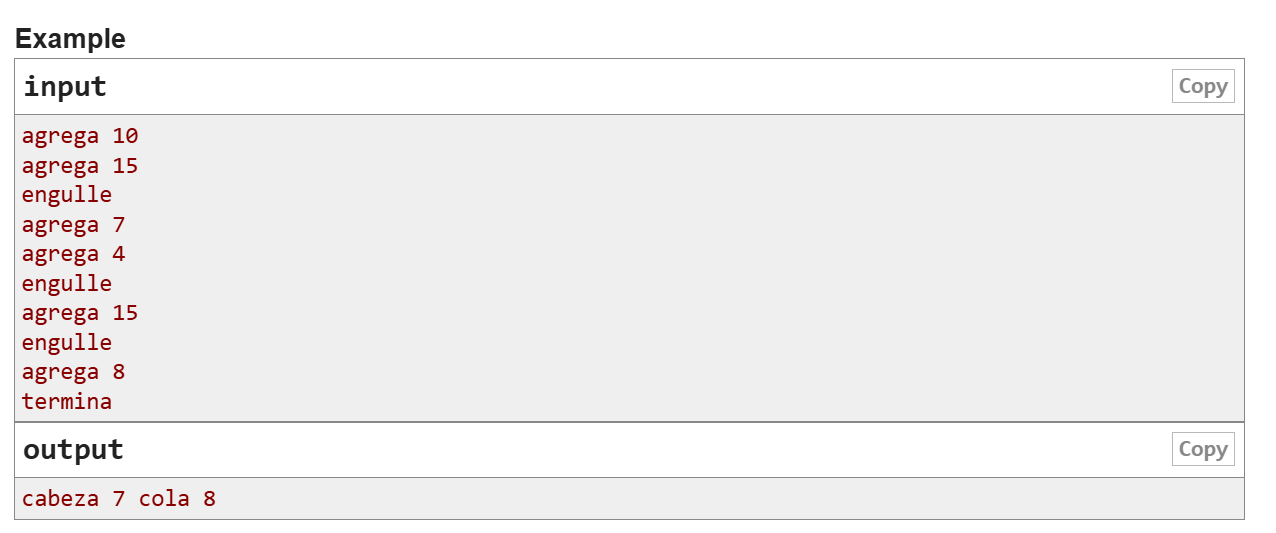

In [9]:
def juego_uroboro():
    fila = []
    while True:
        linea = input()
        if linea == "termina":
            break
        comando, *numero = linea.split()
        if comando == "agrega":
            fila.append(int(numero[0]))
        elif comando == "engulle":
            if len(fila) > 0:
                if len(fila) == 1:
                    fila.clear()
                elif fila[0] > fila[-1]:
                    fila.pop()
                else:
                    fila.pop(0)

    if not fila:
        print("uroboro vacio")
    else:
        print(f"cabeza {fila[0]} cola {fila[-1]}")

if __name__ == "__main__":
    juego_uroboro()

cabeza 10 cola 10


In [ ]:
from collections import deque

def juego_uroboro():
    fila = deque()  # Cambiamos la lista por una deque
    while True:
        linea = input()
        if linea == "termina":
            break
        comando, *numero = linea.split()
        if comando == "agrega":
            fila.append(int(numero[0]))  # append sigue siendo válido
        elif comando == "engulle":
            if len(fila) > 0:
                if len(fila) == 1:
                    fila.clear()  # Vacía toda la deque
                elif fila[0] > fila[-1]:
                    fila.pop()  # Elimina del final
                else:
                    fila.popleft()  # Elimina del inicio de manera eficiente

    if not fila:
        print("uroboro vacio")
    else:
        print(f"cabeza {fila[0]} cola {fila[-1]}")

if __name__ == "__main__":
    juego_uroboro()


## Ejercicio 4

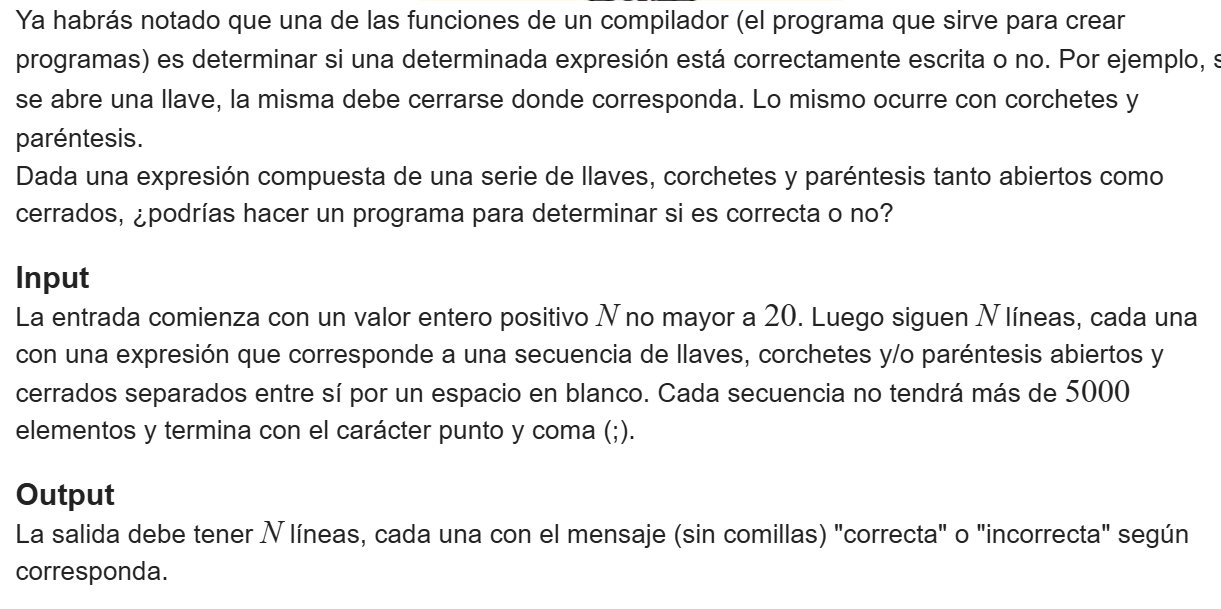

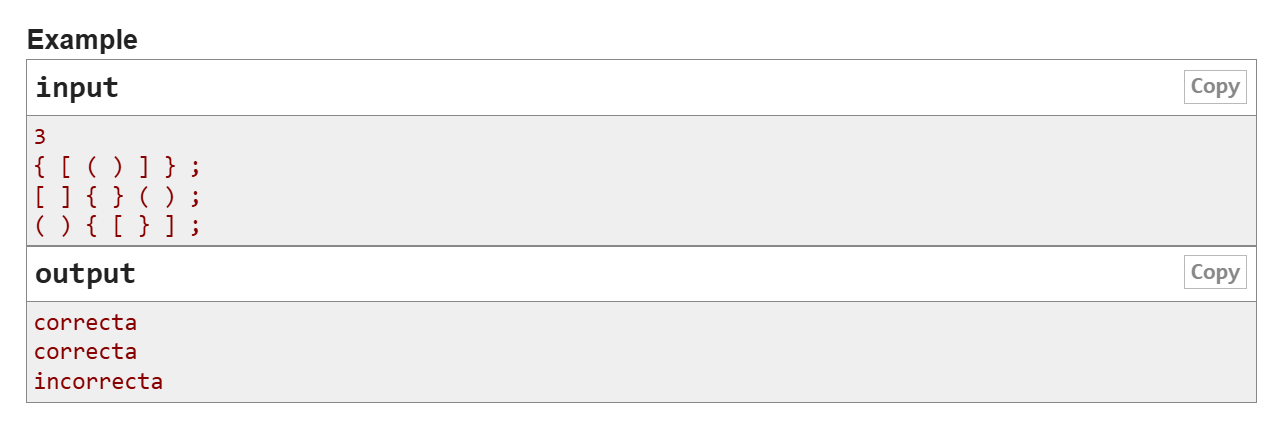

In [12]:
def es_correcta(expresion):
    pila = []
    parentesis = {'{': '}', '[': ']', '(': ')'}
    
    for char in expresion:
        if char in parentesis:  # Es un carácter de apertura
            pila.append(char)
        elif char in parentesis.values():  # Es un carácter de cierre
            if not pila:  # Pila vacía
                return False
            ultimo_abierto = pila.pop()
            if parentesis[ultimo_abierto] != char:
                return False
    
    return not pila  # Si la pila está vacía al final, la expresión es correcta

def main():
    N = int(input())
    for _ in range(N):
        expresion = input()
        if es_correcta(expresion):
            print("correcta")
        else:
            print("incorrecta")

if __name__ == "__main__":
    main()

correcta
correcta
incorrecta


## Ejercicio 5

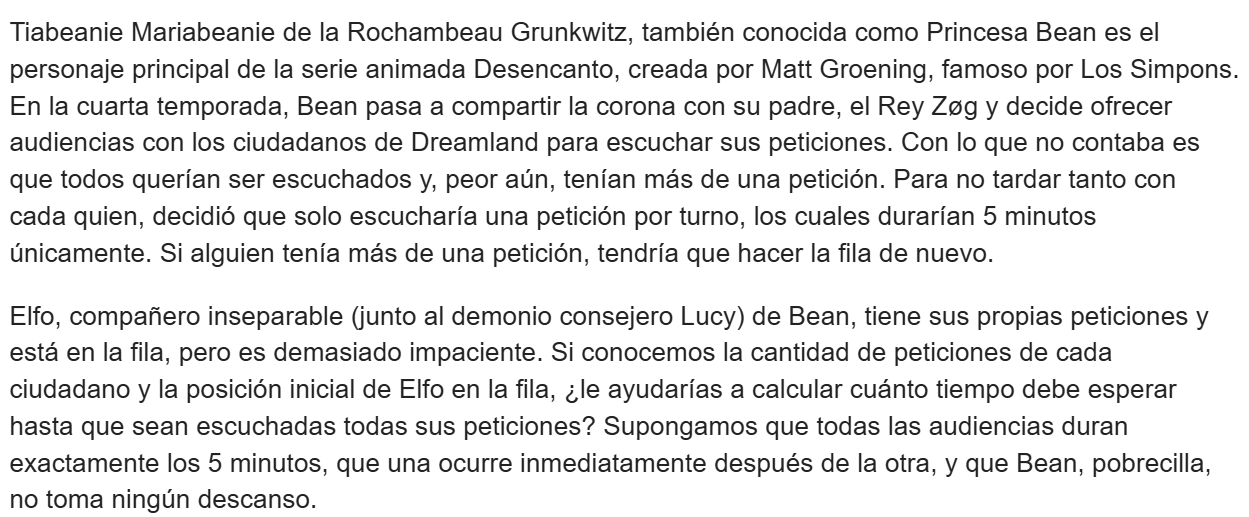

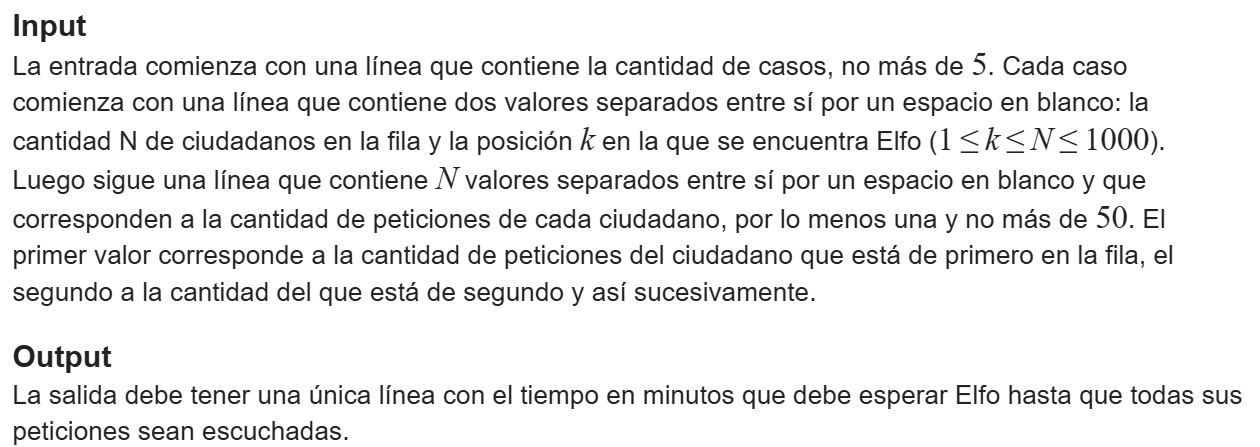

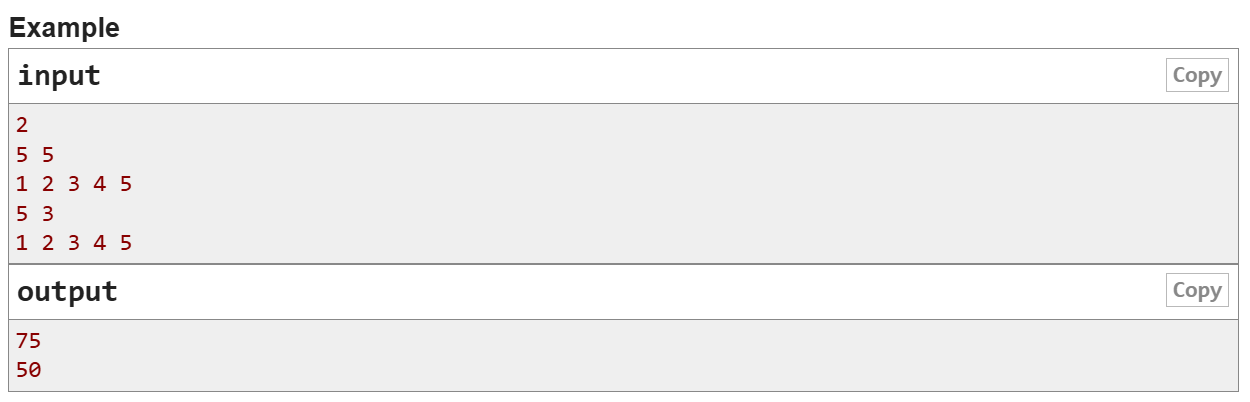

In [17]:
from collections import deque

enEspera = deque([1, 2, 3, 4, 5])
posicion = 3-1
tiempo = 0

while len(enEspera) > 0:
    primero = enEspera.popleft()  # Sacar el primer elemento de la cola
    tiempo += 5  # Incrementar el tiempo por cada operación
    posicion -= 1  # Reducir la posición

    # Si el elemento actual tiene más de 1 petición, reducir y volver a la cola
    if primero > 1:
        primero -= 1
        enEspera.append(primero)

    # Verificar si hemos llegado a la posición deseada
    if posicion == 0 and primero == 1:
        break

    # Si la posición llega a 0 pero no es el último, reiniciarla al final de la cola
    if posicion == 0 and primero != 1:
        posicion = len(enEspera)

    

print(tiempo)


10


In [14]:
def tiempo_espera_elfo(casos):
    resultados = []
    
    for caso in casos:
        N, k, peticiones = caso
        tiempo_total = 0
        cola = [(i, peticiones[i]) for i in range(N)]  # Crear la cola como una lista de tuplas (posición, peticiones)
        elfo_pos = k - 1  # Convertir a índice basado en 0

        while True:
            pos_actual, peticion_actual = cola.pop(0)  # Sacar el ciudadano al frente de la cola
            tiempo_total += 5  # Cada turno dura 5 minutos
            peticion_actual -= 1  # Reducir una petición de este ciudadano
            
            if pos_actual == elfo_pos and peticion_actual == 0:
                # Si es Elfo y se terminaron sus peticiones, se calcula el tiempo
                resultados.append(tiempo_total)
                break
            elif peticion_actual > 0:
                # Si aún le quedan peticiones, vuelve al final de la cola
                cola.append((pos_actual, peticion_actual))
    
    return resultados

# Leer entrada
C = int(input())
casos = []
for _ in range(C):
    # Leer N y k
    N, k = map(int, input().split())
    # Leer las peticiones de los ciudadanos
    peticiones = list(map(int, input().split()))
    casos.append((N, k, peticiones))

# Calcular los tiempos de espera
resultados = tiempo_espera_elfo(casos)

# Imprimir los resultados
for tiempo in resultados:
    print(tiempo)


75
50


In [3]:
from collections import deque

enEspera = deque([2,3,1,4])
tiempo = 0

while len(enEspera) > 0:
    primero = enEspera.popleft()
    tiempo += 5
    if primero > 1:
        primero -= 1
        enEspera.append(primero)
print(tiempo)


50


## Ejercicio 6

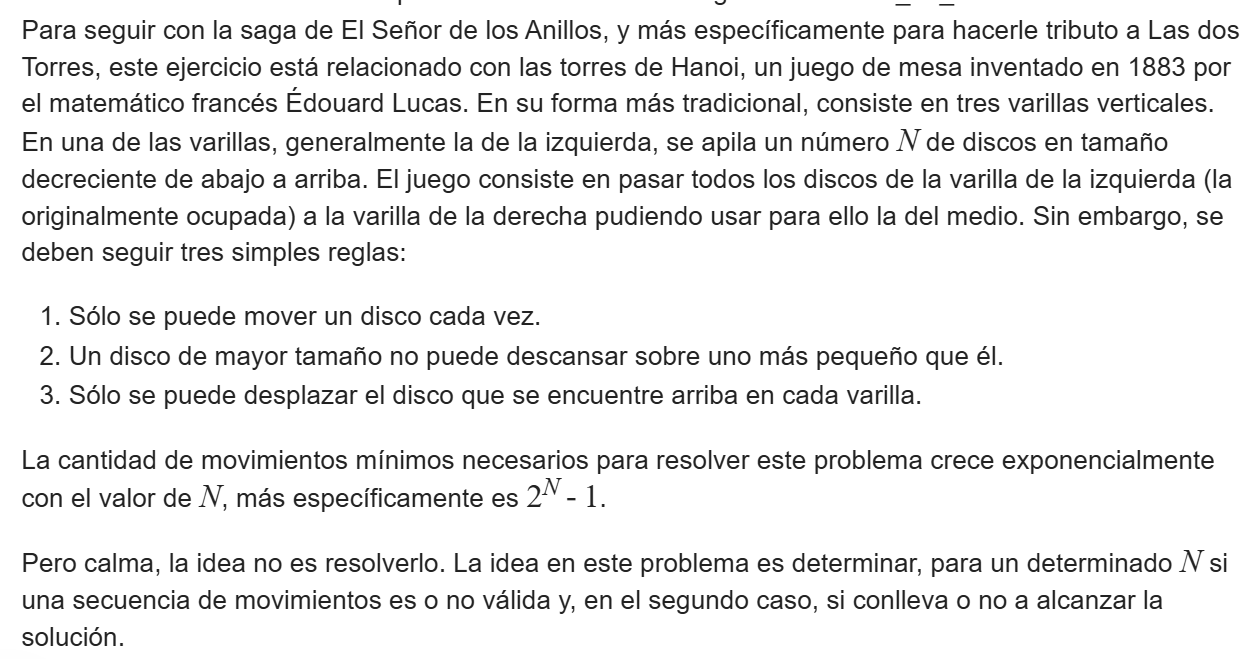

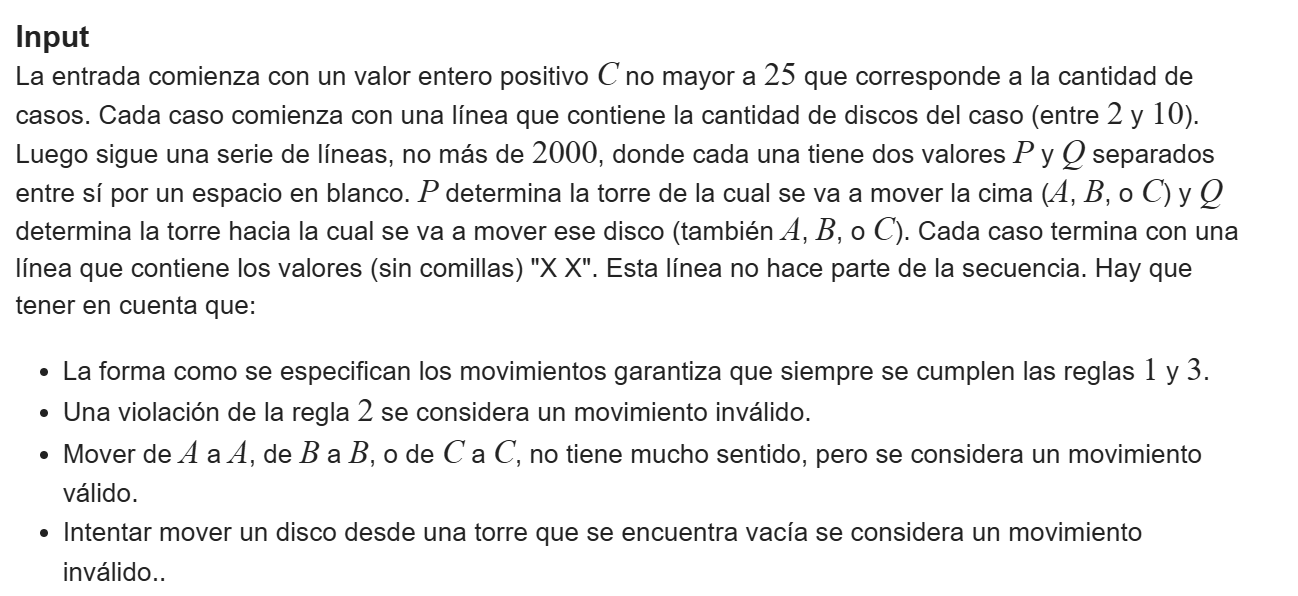

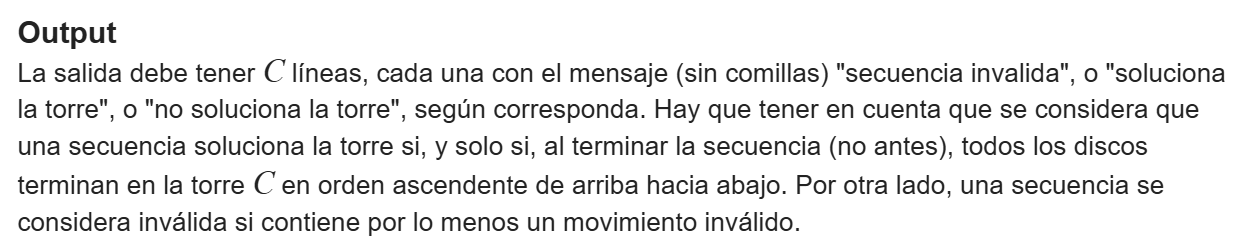

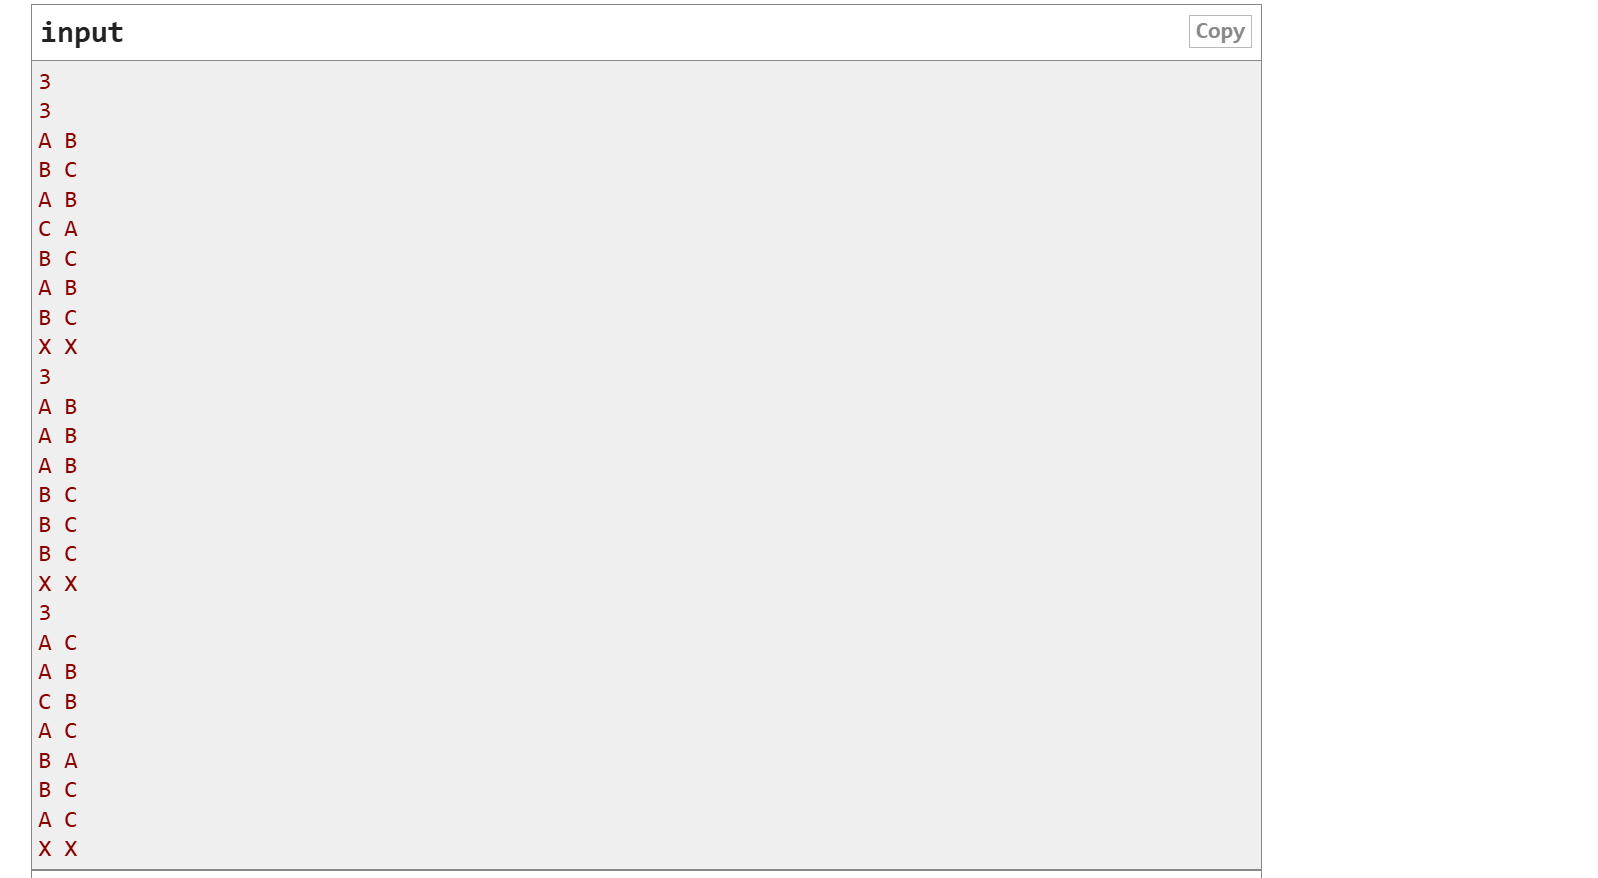

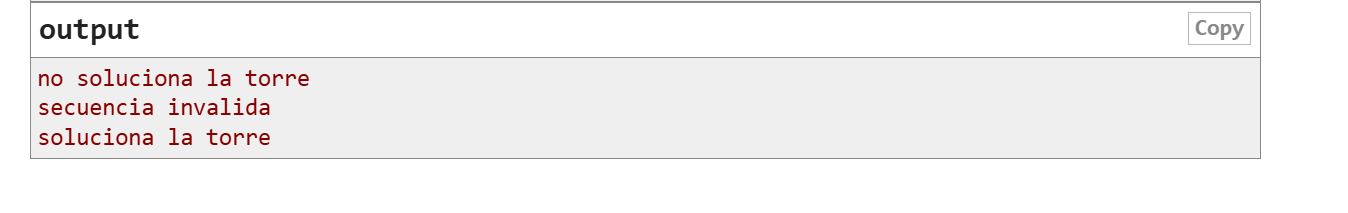

In [ ]:
def valida_torre_hanoi(casos):
    resultados = []

    for caso in casos:
        N, movimientos = caso

        # Inicializar las torres
        torres = {
            'A': list(range(N, 0, -1)),  # La torre A comienza con todos los discos
            'B': [],
            'C': []
        }

        secuencia_valida = True

        for movimiento in movimientos:
            origen, destino = movimiento

            if origen == destino:
                continue  # Movimiento de una torre a sí misma es válido pero no tiene sentido

            if not torres[origen]:
                # Intentar mover desde una torre vacía
                secuencia_valida = False
                break

            disco = torres[origen][-1]

            if torres[destino] and torres[destino][-1] < disco:
                # Intentar mover un disco más grande sobre uno más pequeño
                secuencia_valida = False
                break

            # Movimiento válido, mover el disco
            torres[origen].pop()
            torres[destino].append(disco)

        if not secuencia_valida:
            resultados.append("secuencia invalida")
        elif torres['C'] == list(range(N, 0, -1)):
            resultados.append("soluciona la torre")
        else:
            resultados.append("no soluciona la torre")

    return resultados

# Leer entrada
C = int(input())
casos = []
for _ in range(C):
    N = int(input())
    movimientos = []
    while True:
        movimiento = input().strip()
        if movimiento == "X X":
            break
        origen, destino = movimiento.split()
        movimientos.append((origen, destino))
    casos.append((N, movimientos))

# Procesar los casos
resultados = valida_torre_hanoi(casos)

# Imprimir resultados
for resultado in resultados:
    print(resultado)